In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import matplotlib.style as stl
import seaborn as sns
stl.use('ggplot')
import random
import warnings
warnings.filterwarnings('ignore')

In [2]:
train=pd.read_csv("../input/devfest21-competition/Train (1).csv")
test=pd.read_csv("../input/devfest21-competition/Train (1).csv")
sampl=pd.read_csv("../input/devfest21-competition/sample.csv")
pd.set_option('display.max_columns', None)

In [3]:
test.head()

,id,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,1,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,2,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,3,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,4,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,5,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
iden=test["id"]

In [5]:
iden.shape

(8731,)

In [6]:
test1=test.copy(deep=True)
df = pd.DataFrame(data=test1,columns=test1.columns)
df.drop(["Revenue","id"],axis=1,inplace=True)

In [7]:
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8726,0.0,0.0,0.0,0.0,140.0,4096.090152,0.003810,0.011871,0.000000,0.0,Nov,2,5,7,1,Returning_Visitor,False
8727,1.0,5.0,0.0,0.0,47.0,1480.233333,0.010417,0.027824,15.156438,0.0,Nov,2,2,1,3,Returning_Visitor,True
8728,2.0,47.5,0.0,0.0,30.0,735.583333,0.006897,0.024138,23.510247,0.0,Dec,2,2,2,1,Returning_Visitor,False
8729,0.0,0.0,0.0,0.0,8.0,332.000000,0.000000,0.028571,14.127370,0.0,Nov,1,2,4,8,New_Visitor,True


In [8]:
train.isna().sum()

id                          0
Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64

In [9]:
data=pd.concat([train,test])

In [10]:
data.head()

,id,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,1,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,2,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,3,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,4,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,5,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


# Encoding

In [11]:
from sklearn.preprocessing import OneHotEncoder
data= pd.get_dummies(data, columns = ['Month'])

import category_encoders as ce
ordenc=ce.OrdinalEncoder(cols=['VisitorType','Revenue','Weekend'])
data=ordenc.fit_transform(data)


In [12]:
data.head()

,id,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,Month_Aug,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep
0,1,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,1,1,1,1,1,1,1,0,0,1,0,0,0,0,0,0,0
1,2,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,2,2,1,2,1,1,1,0,0,1,0,0,0,0,0,0,0
2,3,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,4,1,9,3,1,1,1,0,0,1,0,0,0,0,0,0,0
3,4,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,3,2,2,4,1,1,1,0,0,1,0,0,0,0,0,0,0
4,5,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,3,3,1,4,1,2,1,0,0,1,0,0,0,0,0,0,0


# MICE

In [13]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
estimator=RandomForestRegressor(max_depth=5)
mice = IterativeImputer(estimator=estimator,random_state=11,skip_complete=True)
impdata=mice.fit_transform(data)
impdata=pd.DataFrame(impdata,columns=data.columns)

In [14]:
impdata.drop("id", axis=1, inplace=True)

# distribution of data

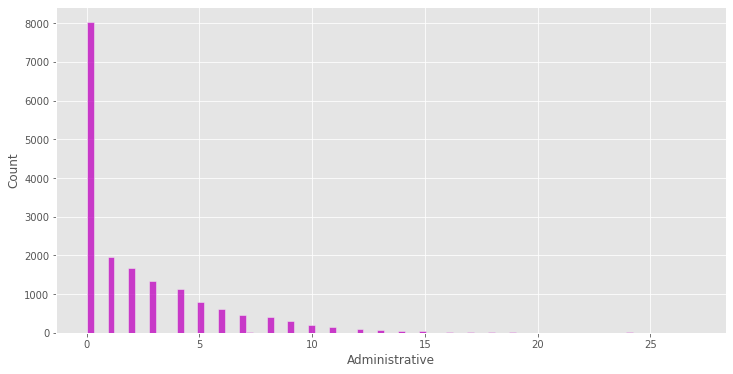

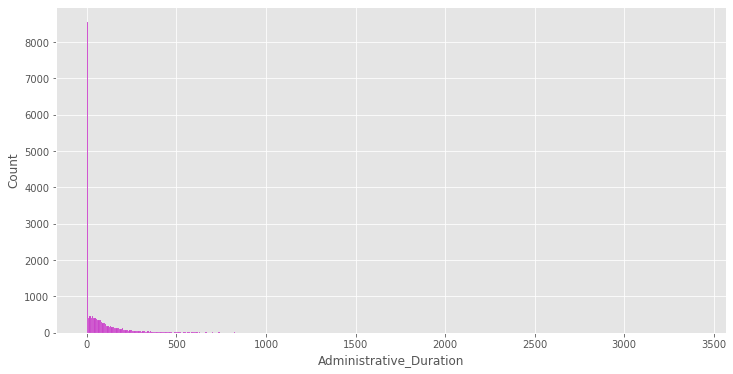

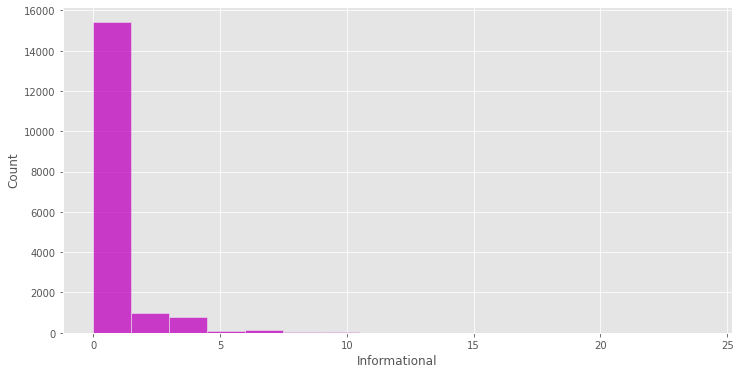

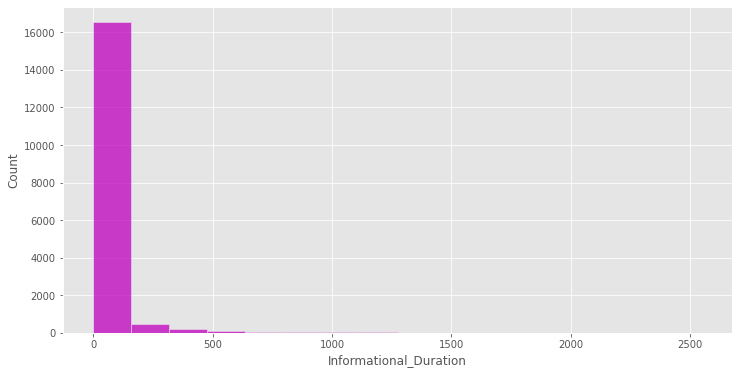

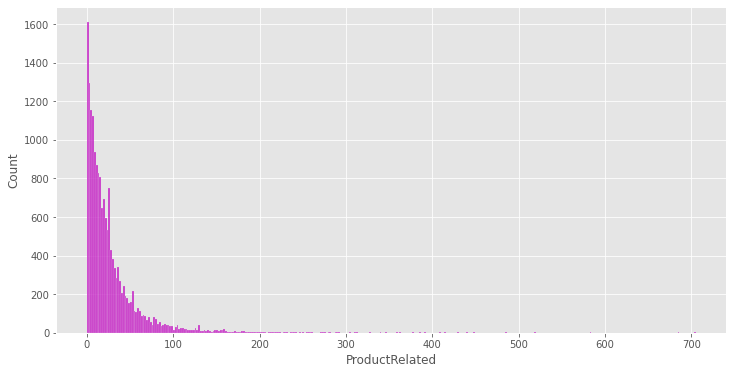

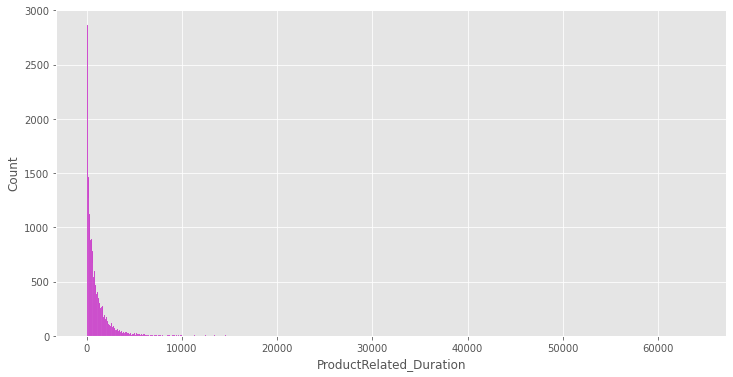

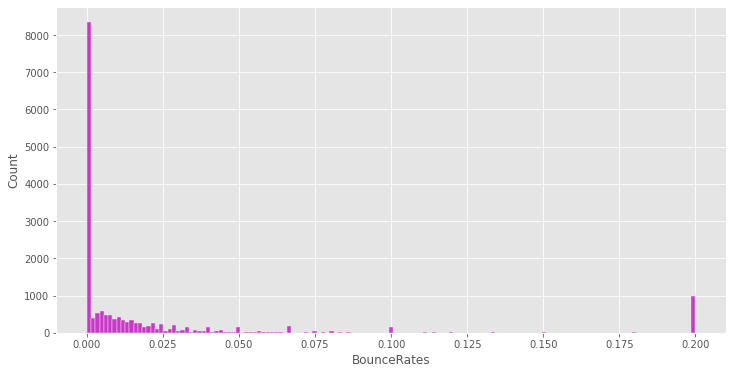

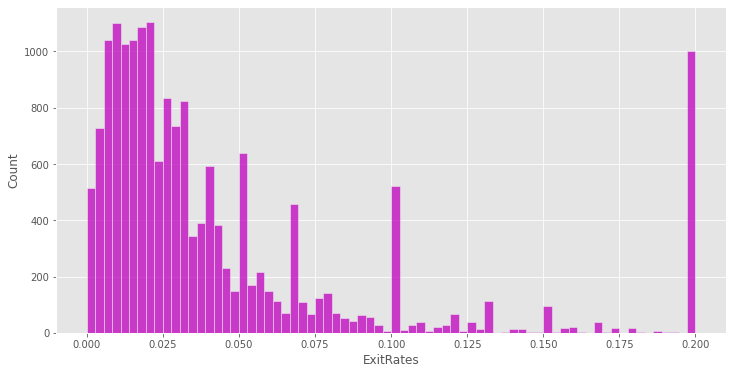

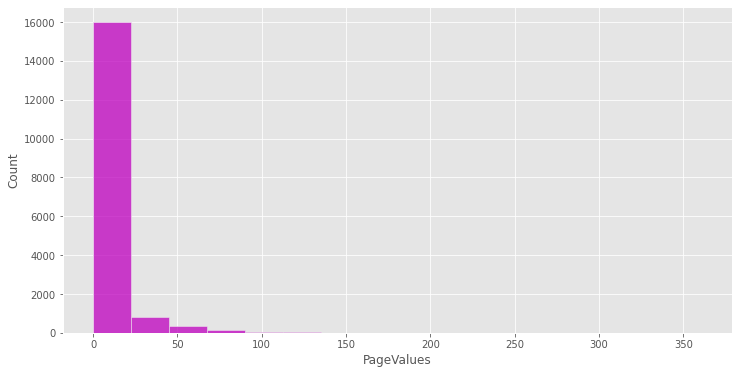

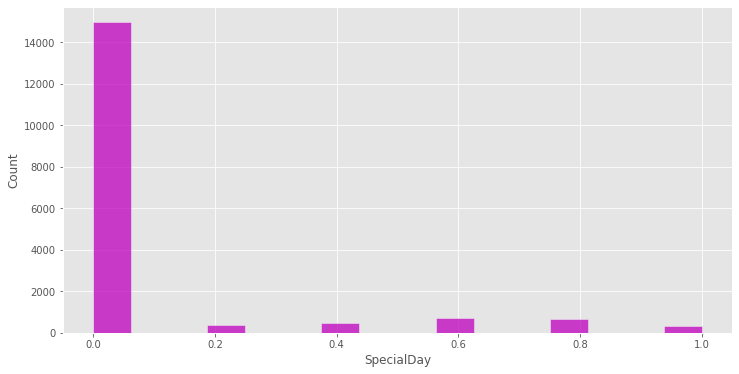

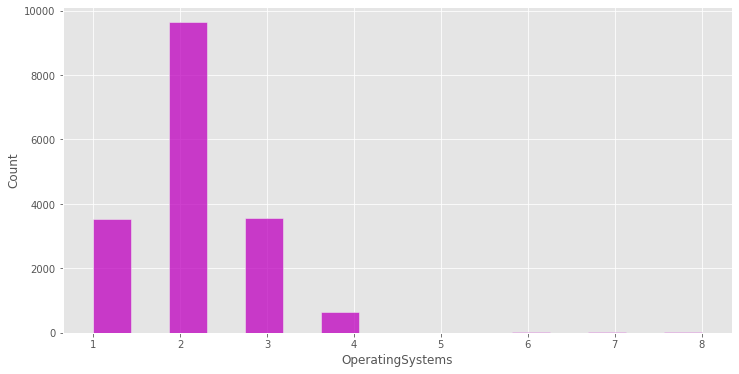

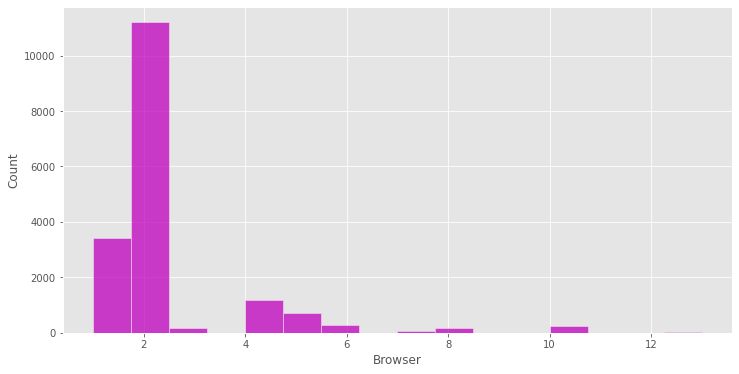

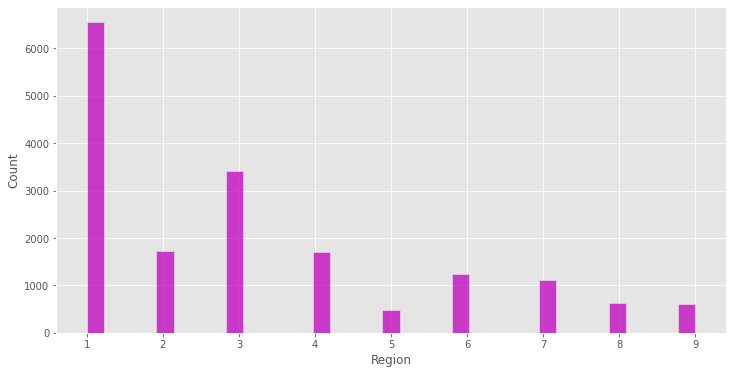

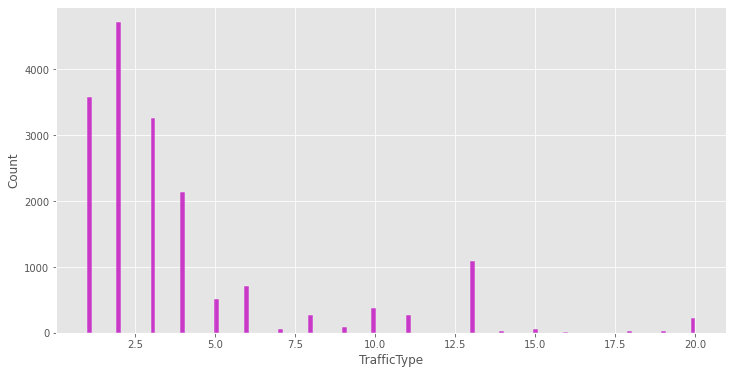

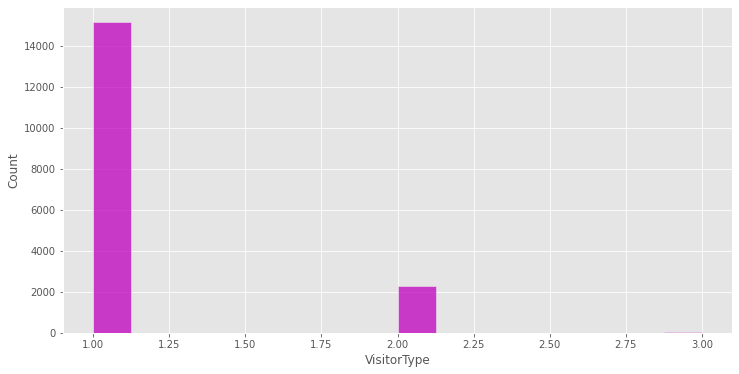

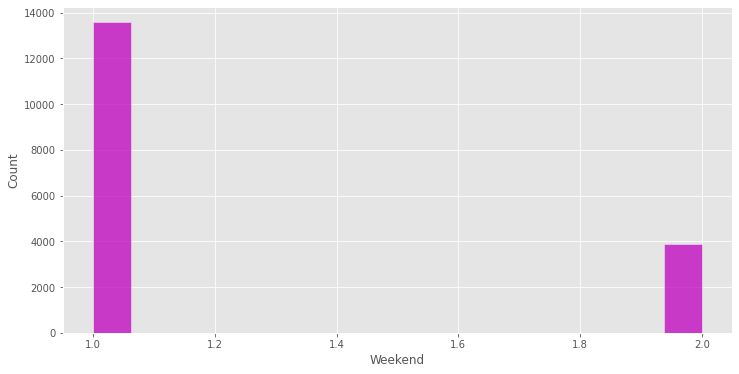

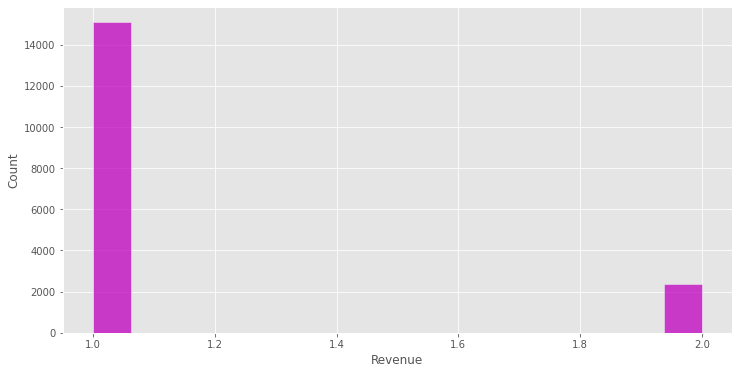

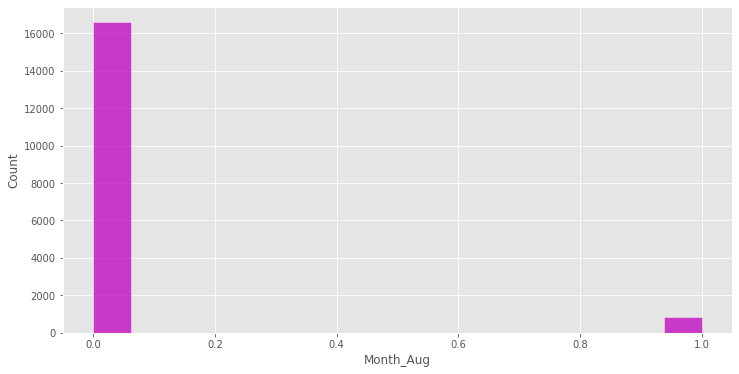

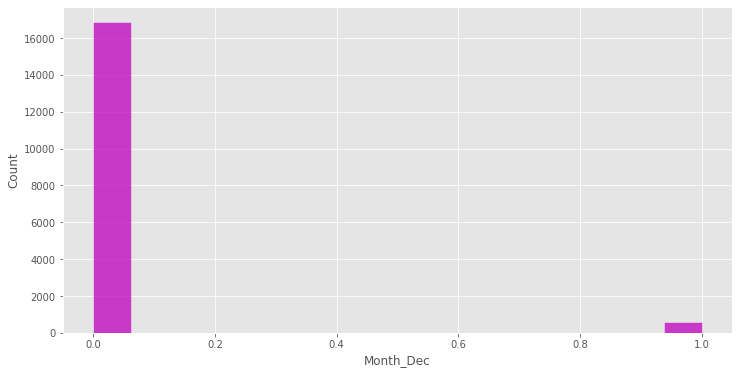

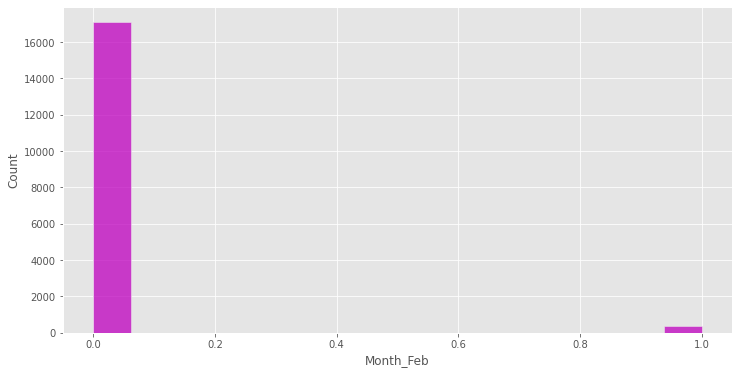

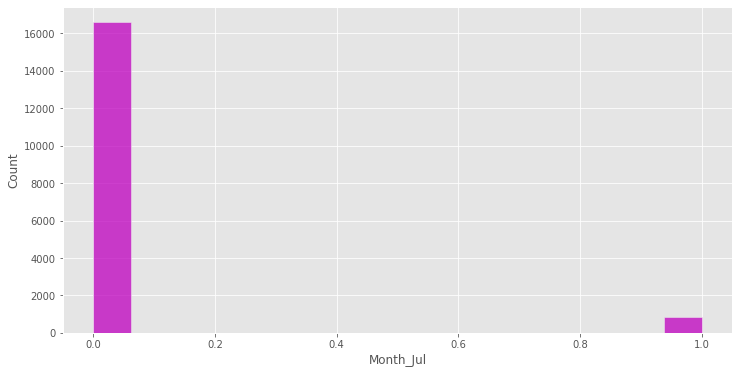

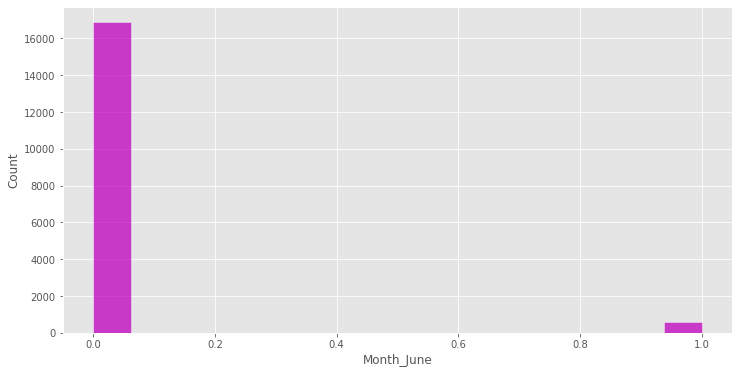

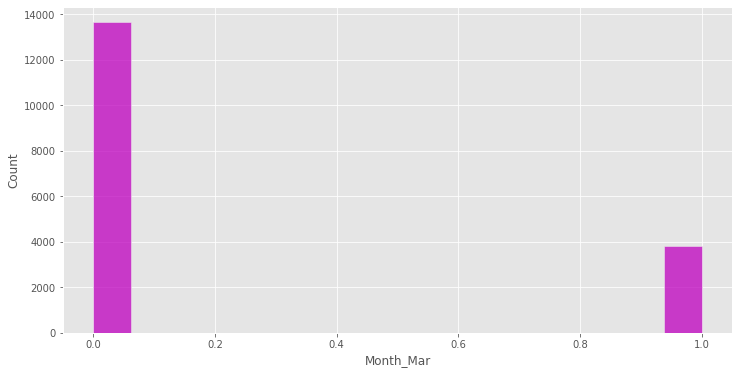

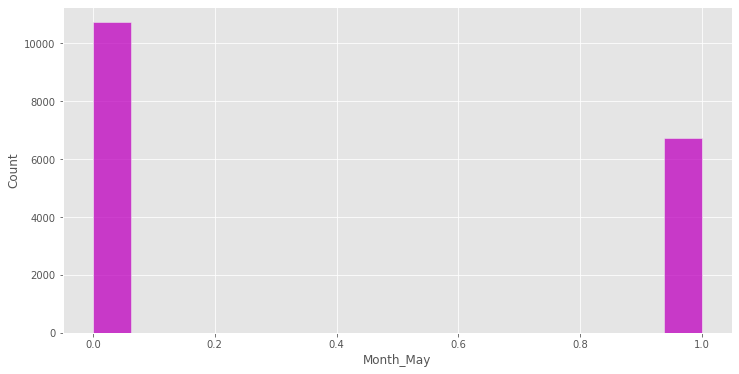

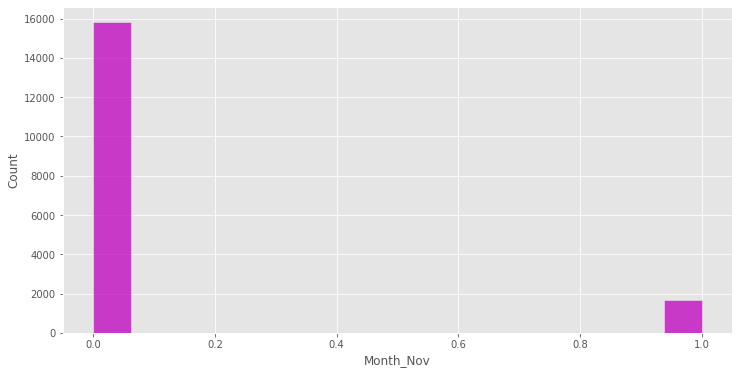

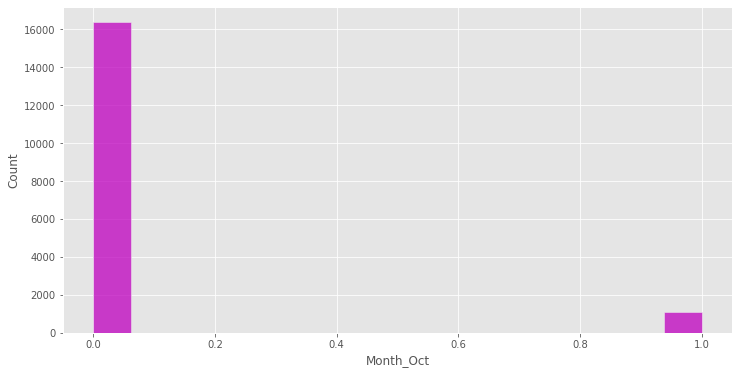

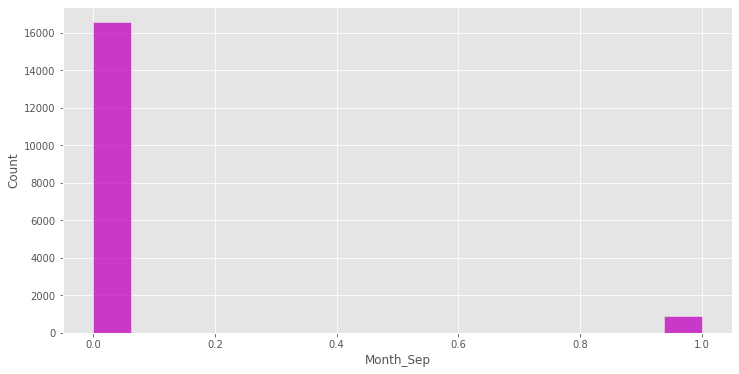

In [15]:
for col in impdata.columns:
    plt.figure(figsize=(12,6))
    sns.histplot(impdata[col], color="m")
    plt.show

In [16]:
def outlier(col):
    color = random.choice(['r', 'g', 'b'])
    fig, ax = plt.subplots(1,2,figsize=(18,5))
    sns.distplot(col, ax=ax[0], color=color)
    sns.boxplot(col, ax=ax[1], color=color)
    plt.suptitle('Distribution & Boxplot for Outlier Detection')
    fig.show()
    return None

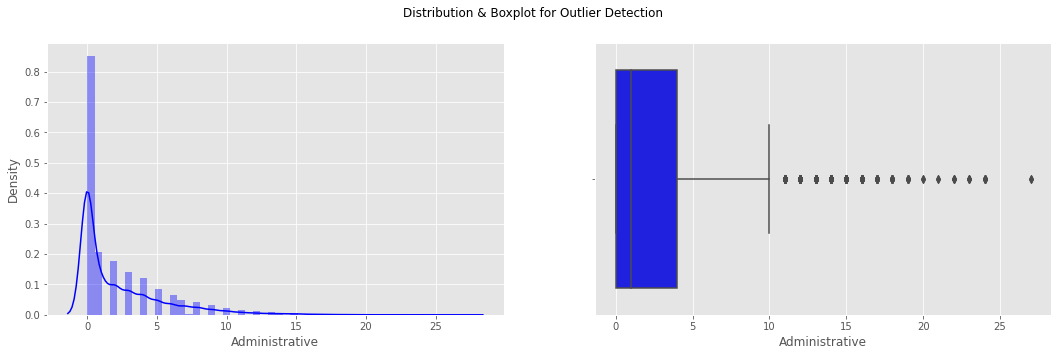

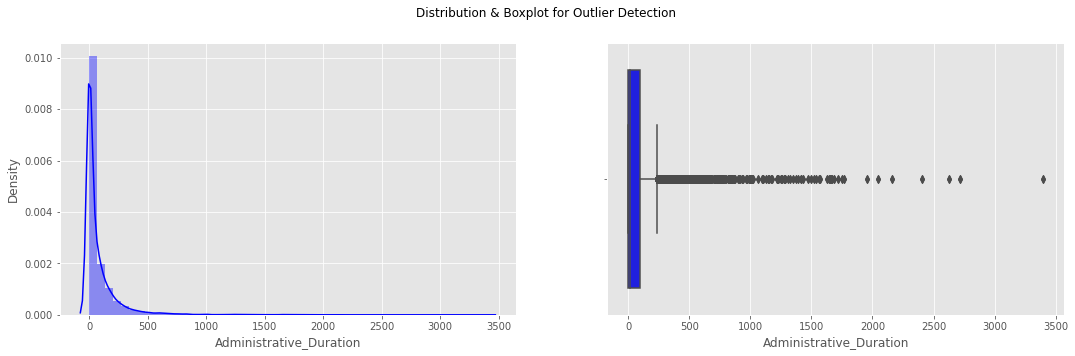

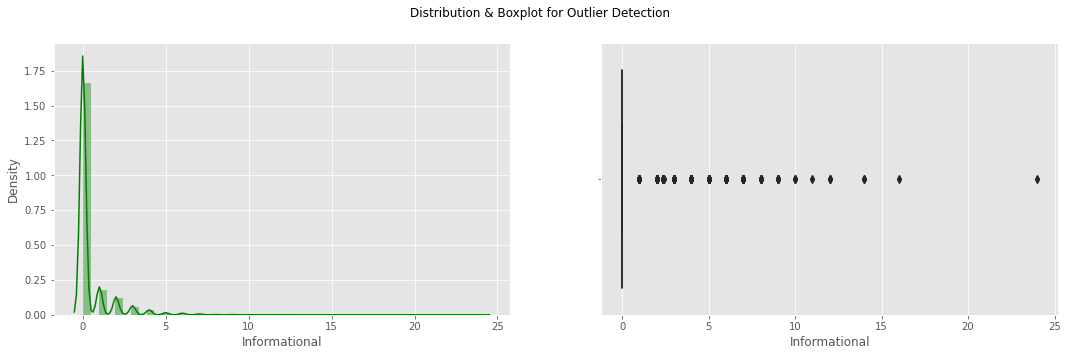

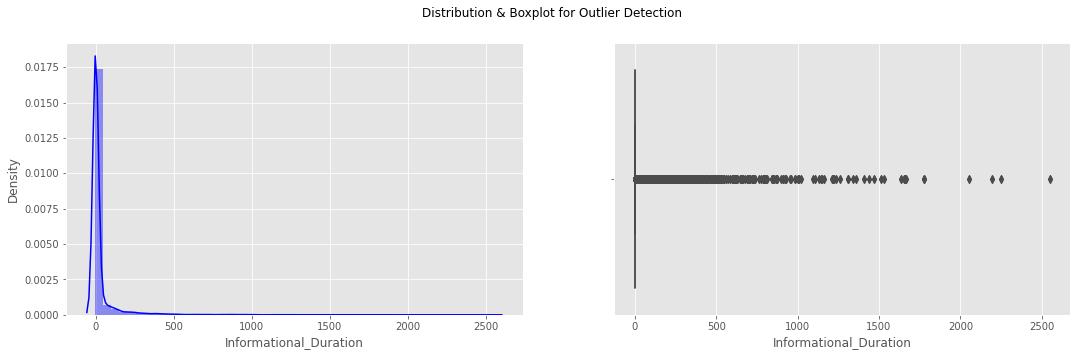

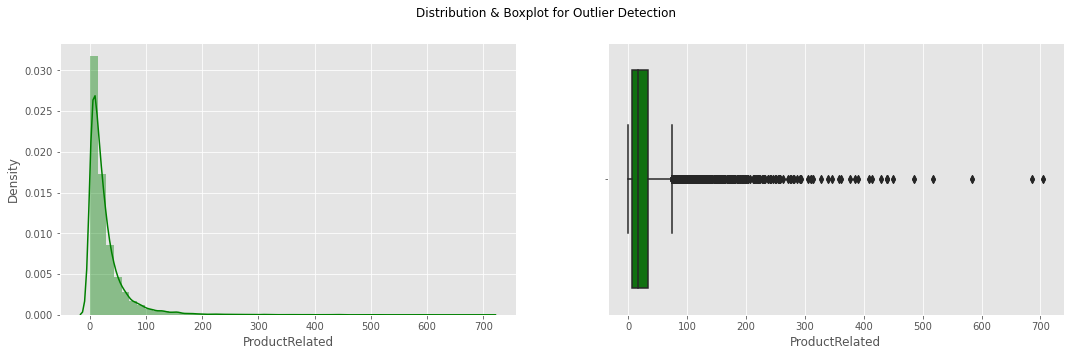

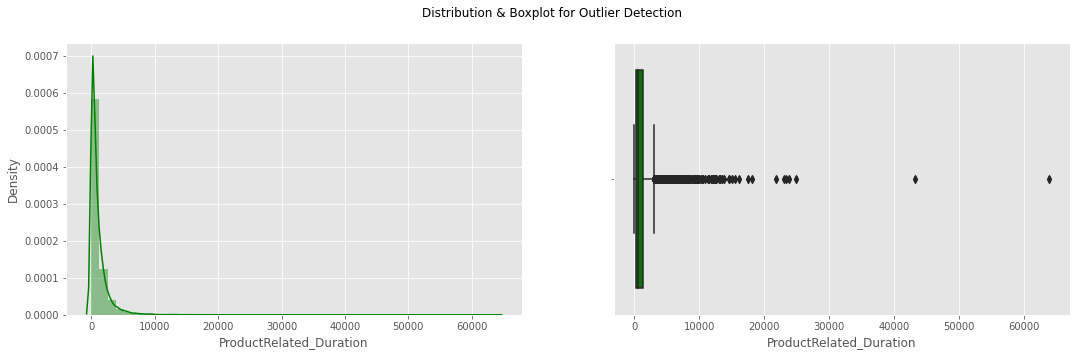

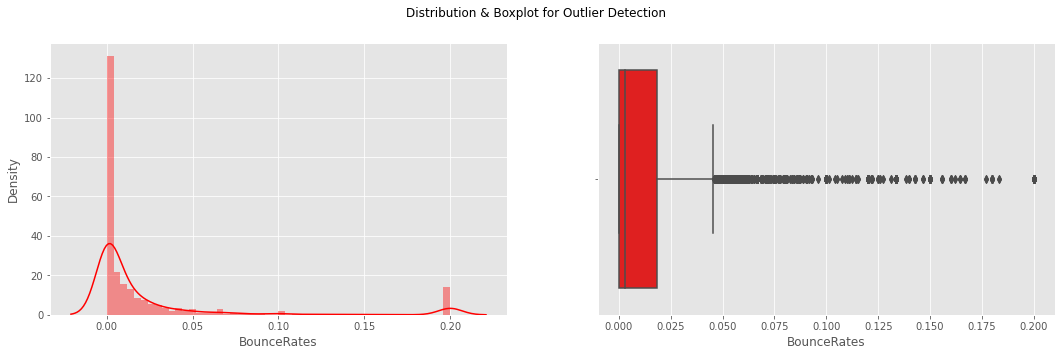

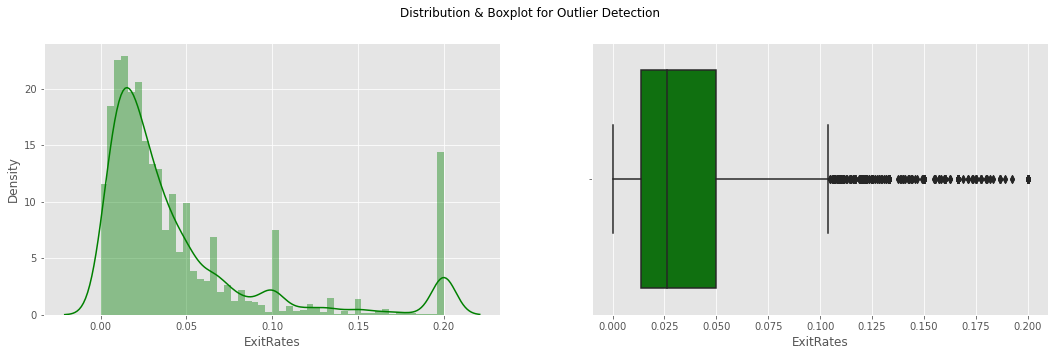

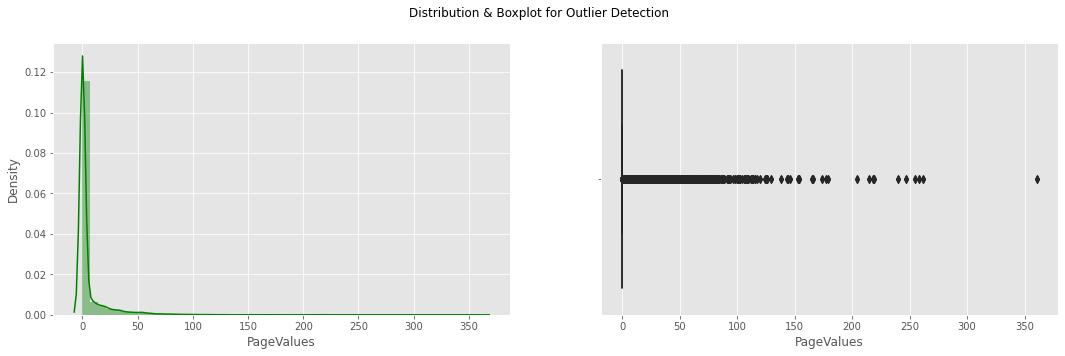

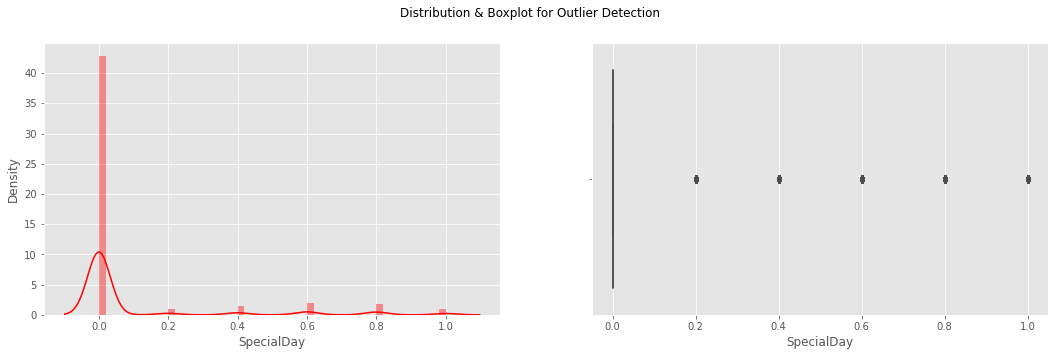

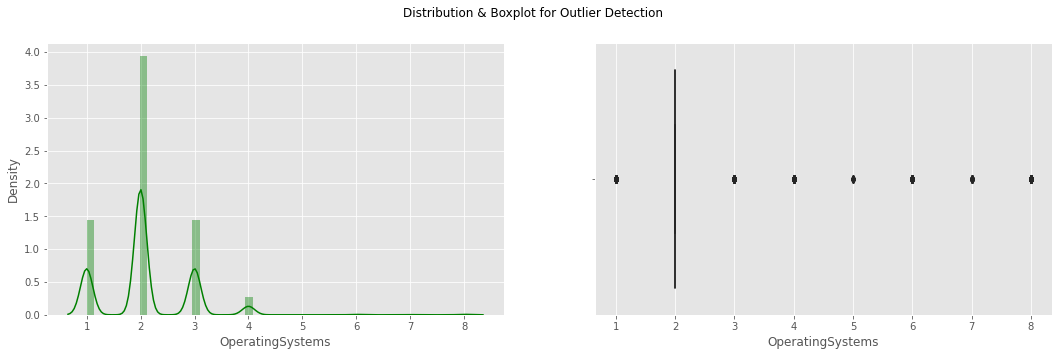

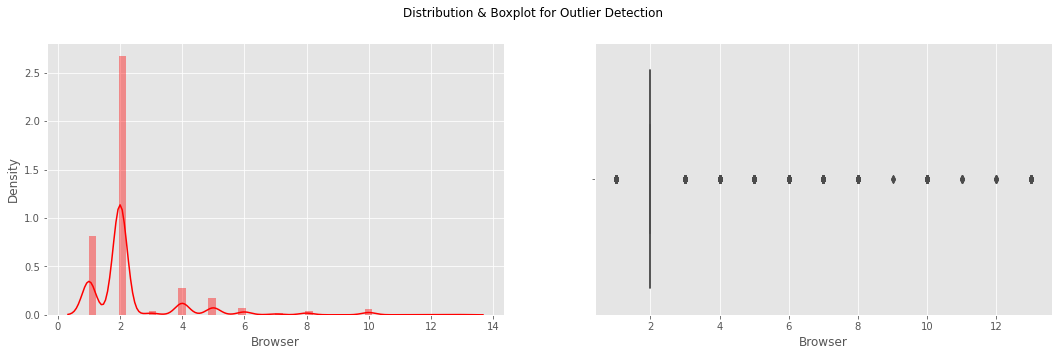

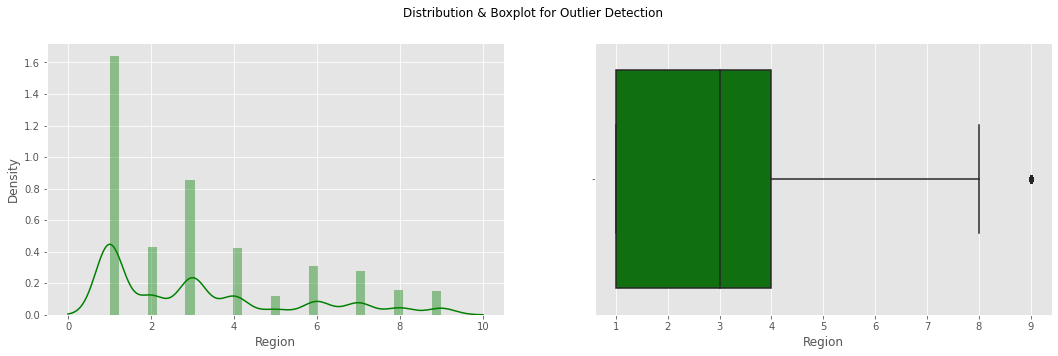

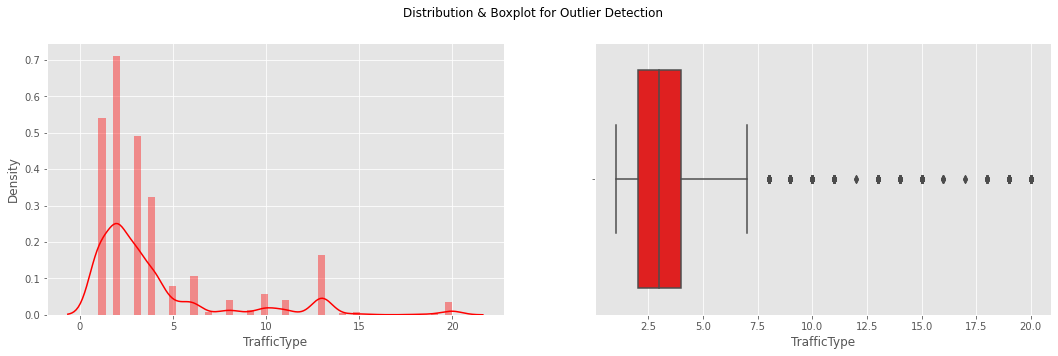

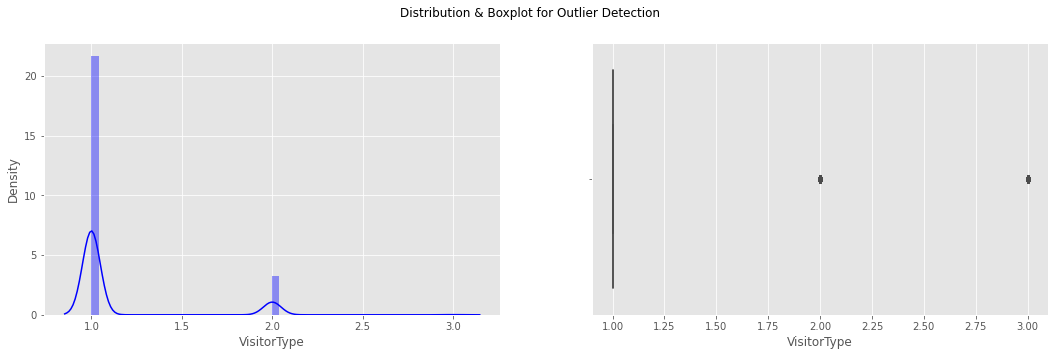

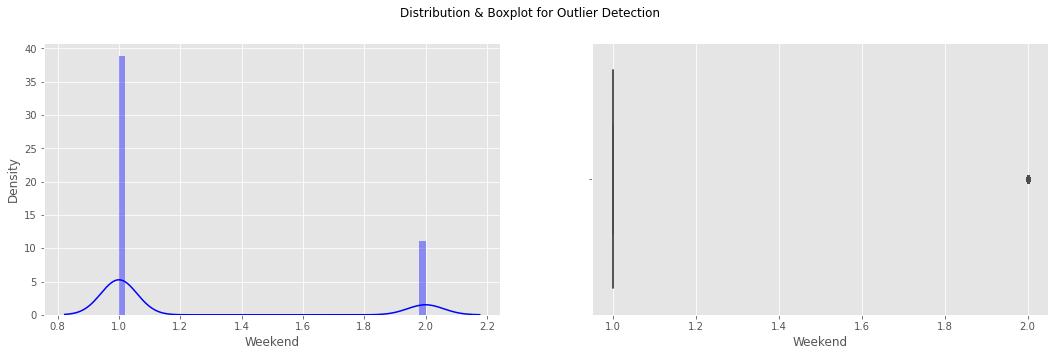

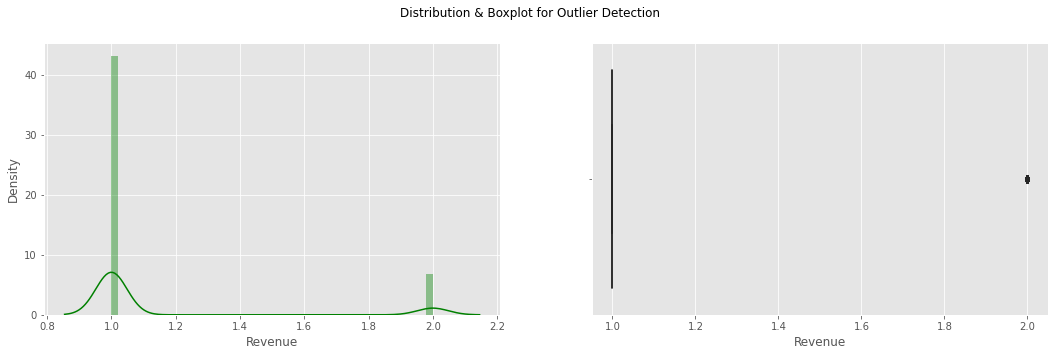

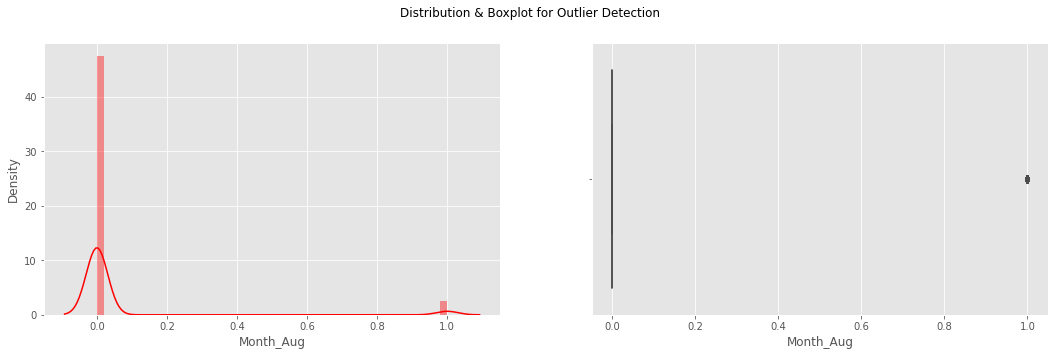

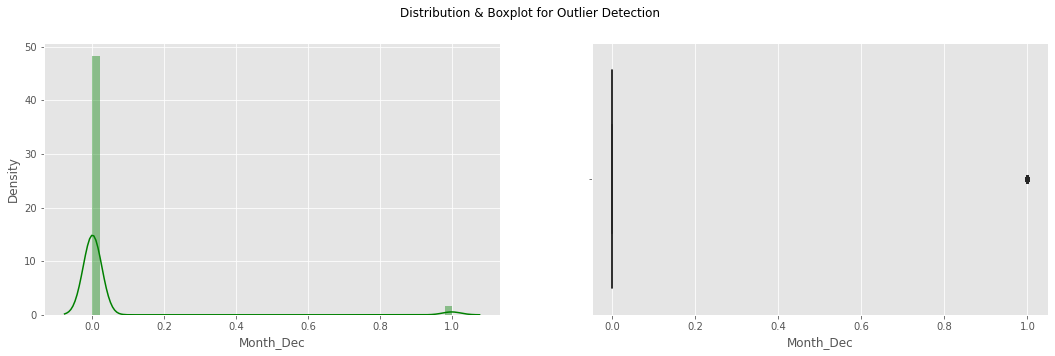

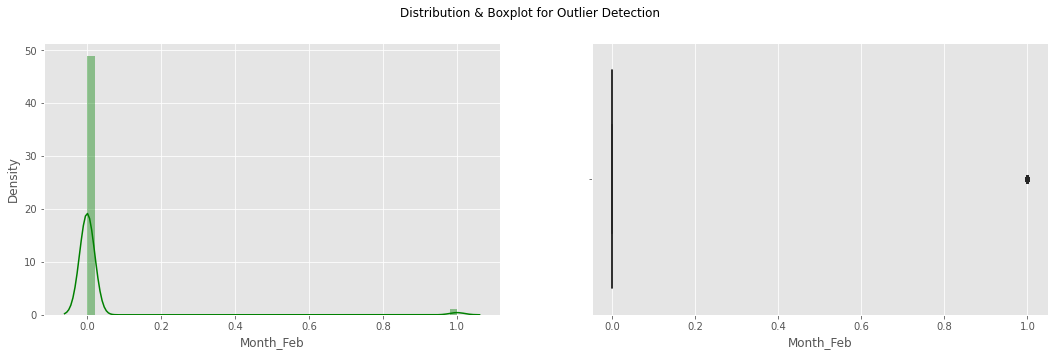

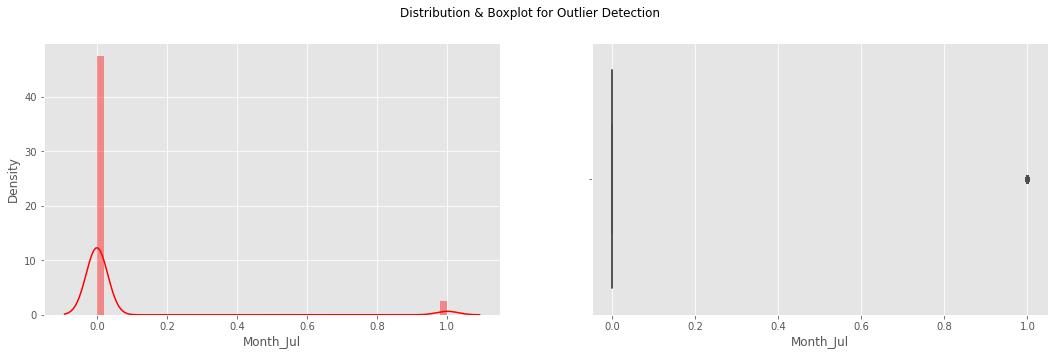

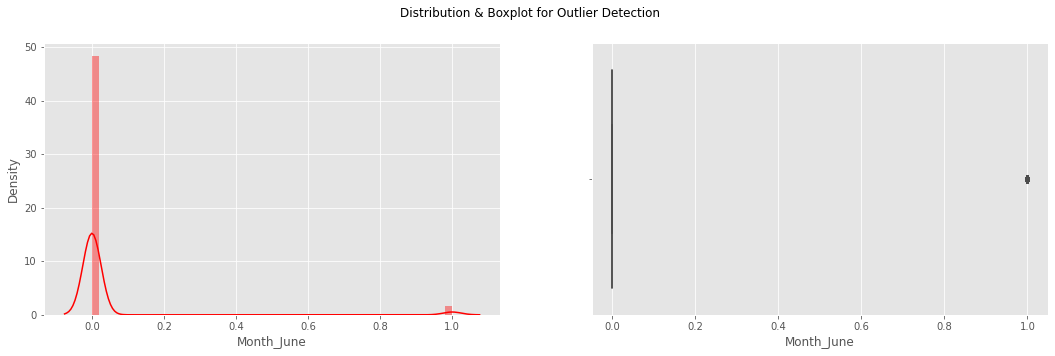

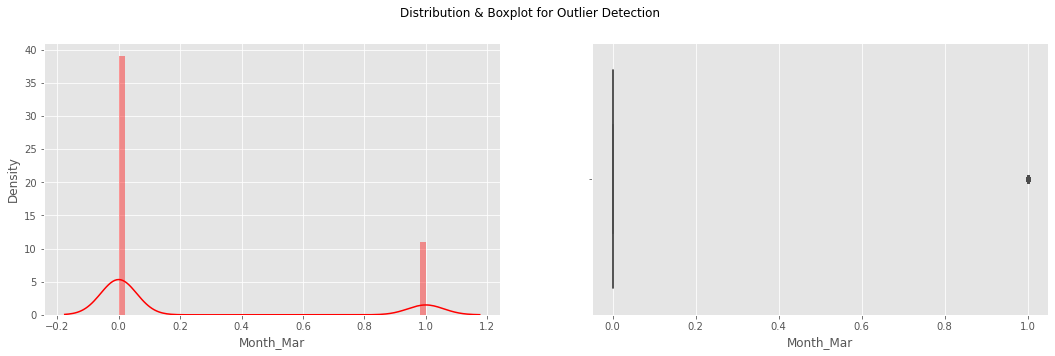

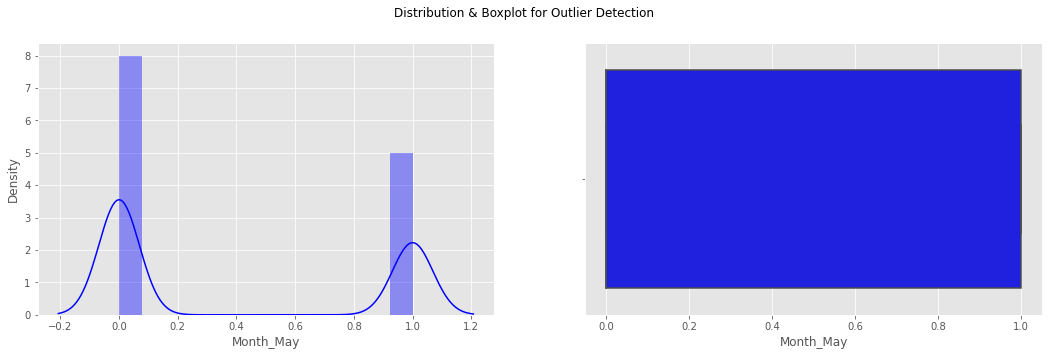

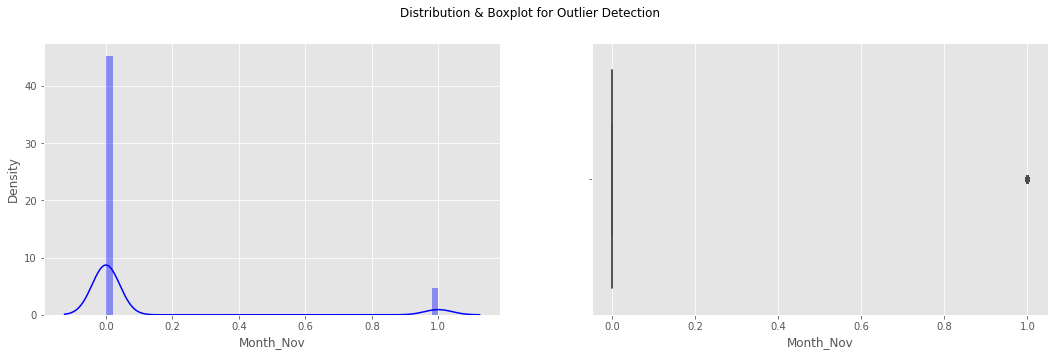

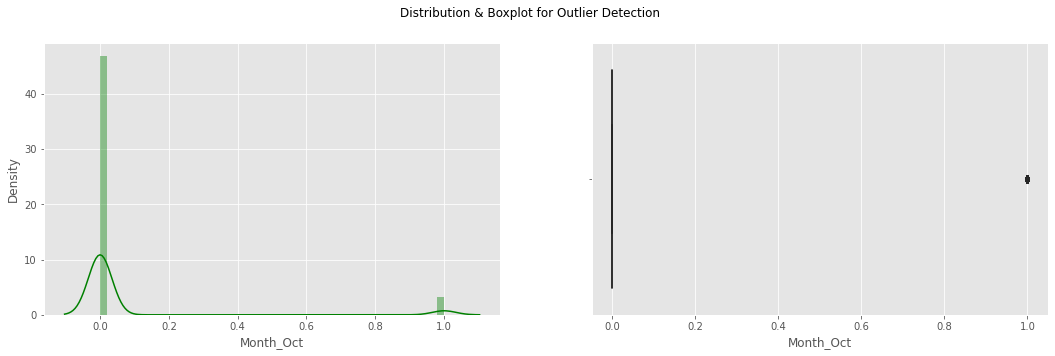

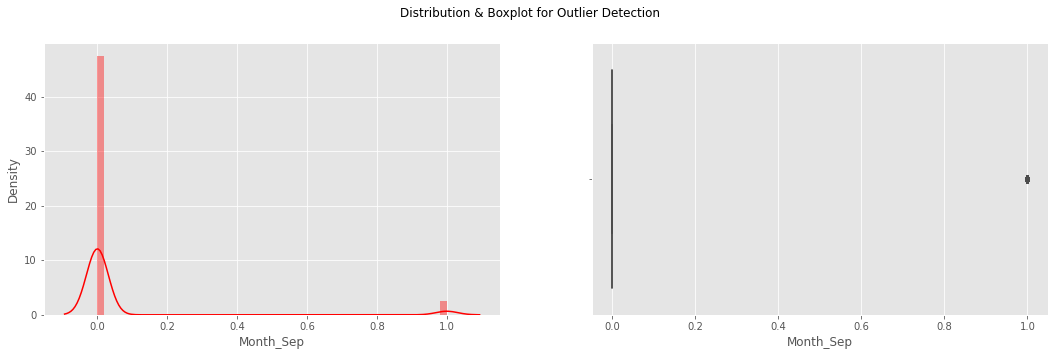

In [17]:
for i in impdata.columns:
    outlier(impdata[i])

# scaling

In [18]:
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()
scaleddata = rs.fit_transform(impdata)
sdata = pd.DataFrame(scaleddata, columns=impdata.columns)

In [19]:
x= sdata.drop("Revenue", axis=1)
y=sdata["Revenue"]

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=20)

# Resampling:RandomOverSampling

![](https://dataaspirant.com/wp-content/uploads/2020/08/10-oversampling.png)

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [21]:
from imblearn.over_sampling import RandomOverSampler
sampler = RandomOverSampler(random_state=11)
xs, ys = sampler.fit_resample(xtrain, ytrain)


# Modeling

In [22]:
forest = RandomForestClassifier(random_state=11)
forest.fit(xs, ys)

ypred_tr = forest.predict(xs)
ypred_ts = forest.predict(xtest)

print("Training Results:\n")
print(classification_report(ys, ypred_tr))
print("\n\nTesting Results:\n")
print(classification_report(ytest, ypred_ts))

Training Results:

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     12068
         1.0       1.00      1.00      1.00     12068

    accuracy                           1.00     24136
   macro avg       1.00      1.00      1.00     24136
weighted avg       1.00      1.00      1.00     24136



Testing Results:

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      3024
         1.0       0.96      0.91      0.93       469

    accuracy                           0.98      3493
   macro avg       0.97      0.95      0.96      3493
weighted avg       0.98      0.98      0.98      3493



# VotingClassifier

In [23]:
from sklearn.ensemble import VotingClassifier
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

In [24]:
model1=SGDClassifier(random_state=0)
model2=RandomForestClassifier(max_depth=10,max_features=0.4,min_samples_split=5,random_state=11)
model3=KNeighborsClassifier(n_neighbors=10)
model4=DecisionTreeClassifier(max_depth=5,max_features=0.6)
model5= VotingClassifier([('sgd',model1),('forest',model2),('knn', model3),
                         ('tree',model4)
                         ],voting='hard')
for model in (model1,model2,model3,model4,model5):
    model.fit(xs,ys)
    print(model.__class__.__name__, model.score(xtest,ytest))

    ypred_tr = model.predict(xs)
    ypred_ts = model.predict(xtest)
    print("Training Results:\n")
    print(classification_report(ys, ypred_tr))
    print("\n\nTesting Results:\n")
    print(classification_report(ytest, ypred_ts))

SGDClassifier 0.8986544517606642
Training Results:

              precision    recall  f1-score   support

         0.0       0.67      0.95      0.78     12068
         1.0       0.91      0.53      0.67     12068

    accuracy                           0.74     24136
   macro avg       0.79      0.74      0.73     24136
weighted avg       0.79      0.74      0.73     24136



Testing Results:

              precision    recall  f1-score   support

         0.0       0.93      0.95      0.94      3024
         1.0       0.64      0.55      0.59       469

    accuracy                           0.90      3493
   macro avg       0.79      0.75      0.77      3493
weighted avg       0.89      0.90      0.90      3493

RandomForestClassifier 0.922702547953049
Training Results:

              precision    recall  f1-score   support

         0.0       0.98      0.93      0.95     12068
         1.0       0.93      0.98      0.95     12068

    accuracy                           0.95     24

# Boosting

In [25]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
modeld= AdaBoostClassifier(n_estimators=100)
model.fit(xs,ys)
print(model.score(xtest,ytest))
ypred_tr = model.predict(xs)
ypred_ts = model.predict(xtest)

print("Training Results:\n")
print(classification_report(ys, ypred_tr))
print("\n\nTesting Results:\n")
print(classification_report(ytest, ypred_ts))

0.9244202691096479
Training Results:

              precision    recall  f1-score   support

         0.0       0.91      0.94      0.92     12068
         1.0       0.94      0.91      0.92     12068

    accuracy                           0.92     24136
   macro avg       0.92      0.92      0.92     24136
weighted avg       0.92      0.92      0.92     24136



Testing Results:

              precision    recall  f1-score   support

         0.0       0.98      0.94      0.96      3024
         1.0       0.67      0.85      0.75       469

    accuracy                           0.92      3493
   macro avg       0.82      0.89      0.85      3493
weighted avg       0.94      0.92      0.93      3493



In [26]:
forest1=RandomForestClassifier(max_depth=18,max_features=0.4,min_samples_split=6,random_state=11)
forest1.fit(xs, ys)

ypred_tr = forest1.predict(xs)
ypred_ts = forest1.predict(xtest)
print(forest1.score(xtest,ytest))
print("Training Results:\n")
print(classification_report(ys, ypred_tr))
print("\n\nTesting Results:\n")
print(classification_report(ytest, ypred_ts))

0.9788147724019467
Training Results:

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     12068
         1.0       1.00      1.00      1.00     12068

    accuracy                           1.00     24136
   macro avg       1.00      1.00      1.00     24136
weighted avg       1.00      1.00      1.00     24136



Testing Results:

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      3024
         1.0       0.91      0.93      0.92       469

    accuracy                           0.98      3493
   macro avg       0.95      0.96      0.95      3493
weighted avg       0.98      0.98      0.98      3493



# GridSearchCV

In [27]:
from sklearn.model_selection import GridSearchCV

In [28]:
from sklearn.model_selection import StratifiedKFold
hyperparameters = {"max_depth":(5, 9, 15, 25), "max_features":(0.2, 0.4, 0.6), "min_samples_split":(2, 5, 8)}

skf = StratifiedKFold(n_splits=8, shuffle=True, random_state=15)

opt = GridSearchCV(estimator=RandomForestClassifier(), param_grid=hyperparameters, cv=skf, scoring="f1", n_jobs=-1)

opt.fit(xs, ys)

GridSearchCV(cv=StratifiedKFold(n_splits=8, random_state=15, shuffle=True),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': (5, 9, 15, 25),
                         'max_features': (0.2, 0.4, 0.6),
                         'min_samples_split': (2, 5, 8)},
             scoring='f1')

In [29]:
opt.best_estimator_

RandomForestClassifier(max_depth=25, max_features=0.2)

In [30]:
opt.best_score_

0.9932960642615678

In [31]:
opt.best_params_

{'max_depth': 25, 'max_features': 0.2, 'min_samples_split': 2}

In [32]:
forest1=RandomForestClassifier(max_depth=25,max_features=0.2,min_samples_split=2,random_state=11)
forest1.fit(xs, ys)

ypred_tr = forest1.predict(xs)
ypred_ts = forest1.predict(xtest)
print(forest1.score(xtest,ytest))
print("Training Results:\n")
print(classification_report(ys, ypred_tr))
print("\n\nTesting Results:\n")
print(classification_report(ytest, ypred_ts))

0.9816776409962783
Training Results:

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     12068
         1.0       1.00      1.00      1.00     12068

    accuracy                           1.00     24136
   macro avg       1.00      1.00      1.00     24136
weighted avg       1.00      1.00      1.00     24136



Testing Results:

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      3024
         1.0       0.94      0.92      0.93       469

    accuracy                           0.98      3493
   macro avg       0.97      0.96      0.96      3493
weighted avg       0.98      0.98      0.98      3493



In [33]:
from sklearn.preprocessing import OneHotEncoder
df= pd.get_dummies(df, columns = ['Month'])

In [34]:
import category_encoders as ce
ordenc=ce.OrdinalEncoder(cols=['VisitorType','Weekend'])
df=ordenc.fit_transform(df)

In [35]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
estimator=RandomForestRegressor(max_depth=5)
mice = IterativeImputer(estimator=estimator,random_state=11,skip_complete=True)
imp=mice.fit_transform(df)
imp=pd.DataFrame(imp,columns=df.columns)

In [36]:
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()
scaleddat = rs.fit_transform(imp)
dfs = pd.DataFrame(scaleddat, columns=imp.columns)

In [37]:
xss=pd.concat([xs,xtest])
yss=pd.concat([ys,ytest])

In [38]:
forest1.fit(xss,yss)

RandomForestClassifier(max_depth=25, max_features=0.2, random_state=11)

In [39]:
ypred=forest1.predict(dfs)

In [40]:
ypred.shape

(8731,)

In [41]:
iden.shape

(8731,)

In [42]:
for i in range(3599):
    iden[i]+=8731

In [43]:
iden[:3599 ].shape

(3599,)

In [44]:
ypred[:3599 ].shape

(3599,)

In [45]:
ypreed=[]
for i in range(8731):
    if ypred[i]==0:
         ypreed.append("False")
    else:
         ypreed.append("True")

In [46]:
len(ypreed)

8731

In [47]:
submission_df=pd.DataFrame({"id":iden[:3599 ],"Revenue":ypreed[:3599]})
submission_df

,id,Revenue
0,8732,False
1,8733,False
2,8734,False
3,8735,False
4,8736,False
...,...,...
3594,12326,True
3595,12327,False
3596,12328,False
3597,12329,False


In [48]:
submission_df.to_csv("wassim.csv", index=False)